/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

Original Images


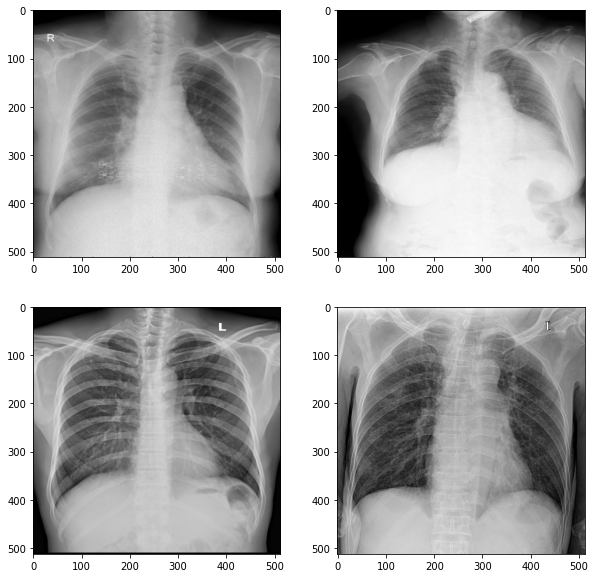

CutMix Images


AttributeError: ignored

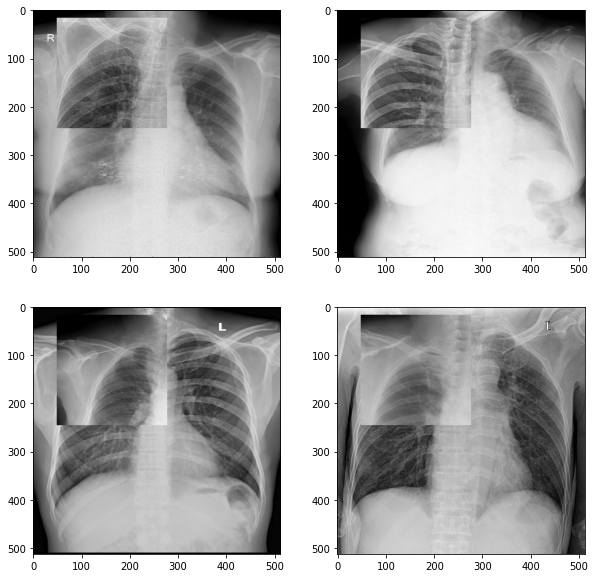

In [ ]:
# SAMPLE
# Generate CutMix image
# Let's use the first image of the batch as the input image to be augmented
input_image = image_batch[0]
image_batch_updated, image_batch_labels_updated = generate_cutmix_image(image_batch, image_batch_labels, 0.7)

# Show original images
print("Original Images")
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,2*i+j+1)
        plt.imshow(image_batch[2*i+j])
plt.show()


# Show CutMix images
print("CutMix Images")
for i in range(2):
    for j in range(2):
        plt.subplot(2,2,2*i+j+1)
        plt.imshow(image_batch_updated[2*i+j])
plt.savefig({}.format(i))
plt.show()

# Print labels
print('Original labels:')
print(image_batch_labels)
print('Updated labels')
print(image_batch_labels_updated)

#data download

- 총 4,394장의 데이터셋
- box위치가 너무 random하면 병변을 가려 오히려 학습에 악영향을 끼칠 것이라 판단해 병변을 가리지 않는 고정된 위치에 box가 생기게 결정.
- 하지만 위치의 다양성을 주기위해 데이터 셋을 4등분하여 cutmix를 통해 생기는 box위치는 총 4가지가 될 수 있도록 설정함.

#generating a batch of data

In [ ]:
# REAL
# 우린 n_images를 아닌 총 images개수(4,394)로 바꿔줘야함
# Create batch of 4,394 images

image_batch = []
image_batch_labels = []

n_images = len(uniq_id)
from tqdm import tqdm
for i in tqdm(range(n_images)):
    image = cv2.cvtColor(cv2.imread(uniq_id[i]), cv2.COLOR_BGR2RGB)
    image_batch.append(image)
    
    label_temp = list(np.floor(np.random.rand(1)*2.99).astype(int))[0]
    if label_temp == 0:
        label = [1,0,0]
    elif label_temp == 1:
        label = [0,1,0]
    else: # label_temp == 2
        label = [0,0,1]
    
    image_batch_labels.append(label)

# Convert image_batch to numpy array
image_batch = np.array(image_batch) #4394개가 들어감
# Conver image_batch_labels to numpy array
image_batch_labels = np.array(image_batch_labels) #4394개가 들어감

 30%|███       | 1329/4394 [00:10<00:23, 131.63it/s]

#generating random bounding box

In [ ]:
def rand_bbox(size, lamb):
    W = size[0]
    H = size[1]
    cut_rat = np.sqrt(1. - lamb)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

In [ ]:
def generate_cutmix_image(image_batch, image_batch_labels, beta):
    """ Generate a CutMix augmented image from a batch 
    Args:
        - image_batch: a batch of input images
        - image_batch_labels: labels corresponding to the image batch
        - beta: a parameter of Beta distribution.
    Returns:
        - CutMix image batch, updated labels
    """
    # generate mixed sample
    lam = np.random.beta(beta, beta)
    rand_index = np.random.permutation(len(image_batch))
    target_a = image_batch_labels
    target_b = image_batch_labels[rand_index]
    bbx1, bby1, bbx2, bby2 = rand_bbox(image_batch[0].shape, lam)
    image_batch_updated = image_batch.copy()
    image_batch_updated[:, bbx1:bbx2, bby1:bby2, :] = image_batch[rand_index, bbx1:bbx2, bby1:bby2, :]
    
    # adjust lambda to exactly match pixel ratio
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (image_batch.shape[1] * image_batch.shape[2]))
    label = target_a * lam + target_b * (1. - lam)
    
    return image_batch_updated, label

## ver1.
1,000장

In [ ]:
!mkdir cutmix_ver2

In [ ]:
%cd /content/cutmix_ver2/

/content/cutmix_ver2


In [ ]:
image_batch_updated, image_batch_labels_updated = generate_cutmix_image(image_batch, image_batch_labels, 0.6)
for i in tqdm(range(1000)):
  image = image_batch_updated[i]
  cv2.imwrite(f"cutmix{i}.png", image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

## ver2.
1,000장

In [ ]:
!mkdir /content/cutmix_ver3

In [ ]:
%cd /content/cutmix_ver3/

/content/cutmix_ver3


In [ ]:
image_batch_updated, image_batch_labels_updated = generate_cutmix_image(image_batch, image_batch_labels, 0.6)
for i in tqdm(range(1000,2000)):
  image = image_batch_updated[i]
  cv2.imwrite(f"cutmix{i}.png", image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

## ver3.
1,000장

In [ ]:
!mkdir /content/cutmix_ver4

In [ ]:
%cd /content/cutmix_ver4/

/content/cutmix_ver4


In [ ]:
image_batch_updated, image_batch_labels_updated = generate_cutmix_image(image_batch, image_batch_labels, 0.6)
for i in tqdm(range(2000,3000)):
  image = image_batch_updated[i]
  cv2.imwrite(f"cutmix{i}.png", image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

## ver4.
1,394장

In [ ]:
!mkdir /content/cutmix_ver5

In [ ]:
%cd /content/cutmix_ver5/

/content/cutmix_ver5


In [ ]:
image_batch_updated, image_batch_labels_updated = generate_cutmix_image(image_batch, image_batch_labels, 0.7)
for i in tqdm(range(3000,4394)):
  image = image_batch_updated[i]
  cv2.imwrite(f"cutmix{i}.png", image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

In [ ]:
len(image_batch_labels)

4394

png -> jpg

In [ ]:
from PIL import Image
import glob
input_path = "/content/cutmix_ver5/*.png" #바꾸고싶은 폴더속 png파일
file_list = [f for f in glob.glob(input_path)]
from PIL import Image
for i in tqdm(range(0,len(file_list))):
    text = file_list[i].split('.')[-2]
    im = Image.open(text+".png").convert('RGB')
    text_1 = text.split('/')[-1]
    im.save('/content/drive/MyDrive/KDT/offline/project/cutmix/'+ text_1+'.jpg', 'jpeg') #png -> jpg

100%|██████████| 1394/1394 [00:24<00:00, 55.84it/s]


In [ ]:
!ls /content/drive/MyDrive/KDT/offline/project/cutmix/ | wc

   4394    4394   64800


cf) 혹시 4개의 버전이 아닌 한번에 처리하고 싶다면

In [ ]:
# path를 넣어주면 zoom in한 이미지를 저장 함수 
def img_cutmix(img_path, folder_dir):
    image_batch_updated, image_batch_labels_updated = generate_cutmix_image(image_batch, image_batch_labels, 0.7) 
    image_cm = image_batch_updated
    filename = img_path.split('/')[-1]
    img = cv2.imwrite(folder_dir+filename+'.png', image_cm)
    return img


for i in range(n_images):
  image = image_batch_labels_updated[i]
  cv2.imwrite(f"cutmix{i}.png", image)


folder_dir = '/content/drive/MyDrive/KDT/offline/project/cutmix'
#img zoomin 저장
for i in uniq_id:
    img_cutmix(i, folder_dir)